In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_regression              # for simulating data     # splitting training and test data
from sklearn.linear_model import LinearRegression         # making the linear predictor model
from sklearn.metrics import mean_squared_error, r2_score  # compute some diagnostics
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from statsmodels.stats import weightstats as stests
from statsmodels.stats.weightstats import ztest as ztest
import scipy.stats as stats
from scipy import stats
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [25]:
#import bcd
bcd = pd.read_csv('/Users/shannoningram/house/Livingroom/FDS-CourseTwo/Data/bcd_final.csv')

bcd_control = pd.read_csv('/Users/shannoningram/house/Livingroom/FDS-CourseTwo/Data/bcd_control.csv')


bcd

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,target_category
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0,0


In [26]:
bcd_control

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,target_category
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0,malignant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0,malignant
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0,malignant
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0,malignant
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0,malignant


In [41]:
#convert to Dataframe


bcd_df = pd.DataFrame(bcd)


#Find X and Y variables

x = bcd[['mean area', 'worst area']].to_numpy()

y = bcd[['target']].to_numpy()


print("The shapes of the x and y variables: ",x.shape,y.shape)
print()


#Split 80/20
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

print("Train shape  Test Shape  Regular")
print(x_train.shape,"", x_test.shape, "", x.shape)
print(y_train.shape,"", y_test.shape, "", y.shape)


# Create the K-Nearest Neighbors classifier with k=3
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train,y_train.ravel())



print()

#create predictor for x off of x_test

y_pred= knn.predict(x_test)
print(y_pred.shape)




# Create an SVM classifier with a linear kernel
svm = SVC(kernel='linear')

# Fit the classifier to the training data
svm.fit(x_train, y_train)

The shapes of the x and y variables:  (569, 2) (569, 1)

Train shape  Test Shape  Regular
(455, 2)  (114, 2)  (569, 2)
(455, 1)  (114, 1)  (569, 1)

(114,)


/Users/shannoningram/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [28]:
#Performance metrics
acc_score = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {acc_score:.2f}%")


conf_matrix = confusion_matrix(y_test, y_pred)

print(conf_matrix)


cls_report = classification_report(y_test, y_pred)
print(cls_report)


Accuracy Score: 0.93%
[[38  5]
 [ 3 68]]
              precision    recall  f1-score   support

           0       0.93      0.88      0.90        43
           1       0.93      0.96      0.94        71

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



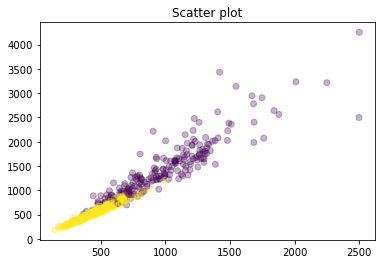

In [37]:

#Scatter plot
plt.scatter(x[:,0], x[:,1], c=y, alpha =.3)

plt.title("Scatter plot")
#plt.legend()
plt.show()


In [40]:
# Subset the data to include only malignant and benign tumors
malignant = bcd_control[bcd_control['target'] == 0]['mean area']
benign = bcd_control[bcd_control['target'] == 1]['mean area']

# Conduct a t-test to compare the mean value of mean area for malignant and benign tumors
t, p = stats.ttest_ind(malignant, benign)

# Print the results
print('t =', t)
print('p =', p)

if p < .0000000005:
    print("Reject the hypothesis")
else:
    print("Fail to reject")

t = 23.938687235690992
p = 4.734564310307344e-88
Reject the hypothesis
